# TWO: 1) Extract reviews of any product from ecommerce website like amazon.       2) Perform emotion mining

In [1]:
!pip install scrapy

  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=12559 sha256=373b76623e13dee7b4745672cfe7621bbb1cc41e8ef11c75aca6c7aa500261eb
  Stored in directory: c:\users\sharda\appdata\local\pip\cache\wheels\a5\de\8a\4b52190a95d99c042ec6bd5ad2de3a3c1b5ce71d69f0bbd036
Successfully built PyDispatcher


In [4]:
# !pip install scrapy
# Open cmd
# scrapy startproject Scrape_AmazonReviews
# scrapy genspider amazon_review https://www.amazon.in/
# https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber=
# OR
# https://www.amazon.in/Bosch-Inverter-Control-Automatic-Loading/product-reviews/B08SR372S7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=
# create file with "extract_reviews.py" and save it in "Scrape_AmazonReviews\Scrape_AmazonReviews\spiders" folder containing below code

##

import scrapy

class AmazonReviewsSpider(scrapy.Spider):

    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the product reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')
            
            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': 
                      ''.join(review.xpath('.//text()').extract()),
                      'comment': 
                          ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

In [ ]:
# in cmd 
# scrapy runspider Scrape_AmazonReviews\Scrape_AmazonReviews\spiders\extract_reviews.py -o extract_reviews.csv

In [1]:
import pandas as pd
book=pd.read_csv('D:/Course/ExcelR_Classroom_Study/Data_Science_Assignment/16._Text_Mining/extract_reviews.csv')
book

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n we bough first set...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Go for this withou...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Best set of books....
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n 499 is far too muc...
4,3.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n It is as shown in ...
...,...,...
915,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n My child loved it....
916,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n Good quality, hand..."
917,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Honestly I'm not h...
918,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Nice book. Quality...


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
reviews = pd.read_csv('D:/Course/ExcelR_Classroom_Study/Data_Science_Assignment/16._Text_Mining/extract_reviews_2.csv')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Best washing machi...
1,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n I tell u honestly,..."
2,3.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n The machine is gre...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n We did not buy a f...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Very good and fast...
...,...,...
261,1.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I have been trying...
262,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n We are using Bosch...
263,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good product and f...
264,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Is minor rust on t...


## Text Preprocessing

In [4]:
reviews=[str(comment).strip() for comment in reviews['comment']] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['Best washing machine in the world 🌍 i use whirlpool machine before I faced so many issues then i got Bosh washing machine i am writing this review ofter 6months of using Bosh feeling really happy to purch the best 💗 machine 👍😊',
 "I tell u honestly, market is flooded with autom machines, at huge marketing gimmicks, don't fall for it, Bosch technology is apar, from other manufacturers, the noise level is so calm, that sometimes we even forget that machine is running, until the final alarm buzzes.Washing is so easy to operate as per indian mothers, it's very very easy to remember and operate..no confusion at all.Quality of washing is very neat, do as per the modes given, bt one advice always keep the rpm at 800-1000, for cloth quality to be long life ..Consumption of watr and electricity is bery less as compared to our last LG semi automatic machine.IM IN LOVE WITH BOSCH , PLANNING TO PURCHASE THE DISHWASHER TOO...ALL THE BEST . FOR ANY QUERIES PLZ ASK .",
 "The machine is great. It's 

In [5]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"Best washing machine in the world 🌍 i use whirlpool machine before I faced so many issues then i got Bosh washing machine i am writing this review ofter 6months of using Bosh feeling really happy to purch the best 💗 machine 👍😊 I tell u honestly, market is flooded with autom machines, at huge marketing gimmicks, don't fall for it, Bosch technology is apar, from other manufacturers, the noise level is so calm, that sometimes we even forget that machine is running, until the final alarm buzzes.Washing is so easy to operate as per indian mothers, it's very very easy to remember and operate..no confusion at all.Quality of washing is very neat, do as per the modes given, bt one advice always keep the rpm at 800-1000, for cloth quality to be long life ..Consumption of watr and electricity is bery less as compared to our last LG semi automatic machine.IM IN LOVE WITH BOSCH , PLANNING TO PURCHASE THE DISHWASHER TOO...ALL THE BEST . FOR ANY QUERIES PLZ ASK . The machine is great. It's very simp

In [6]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Best washing machine in the world 🌍 i use whirlpool machine before I faced so many issues then i got Bosh washing machine i am writing this review ofter 6months of using Bosh feeling really happy to purch the best 💗 machine 👍😊 I tell u honestly market is flooded with autom machines at huge marketing gimmicks dont fall for it Bosch technology is apar from other manufacturers the noise level is so calm that sometimes we even forget that machine is running until the final alarm buzzesWashing is so easy to operate as per indian mothers its very very easy to remember and operateno confusion at allQuality of washing is very neat do as per the modes given bt one advice always keep the rpm at 8001000 for cloth quality to be long life Consumption of watr and electricity is bery less as compared to our last LG semi automatic machineIM IN LOVE WITH BOSCH  PLANNING TO PURCHASE THE DISHWASHER TOOALL THE BEST  FOR ANY QUERIES PLZ ASK  The machine is great Its very simple and easy to use The noise l

In [7]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sharda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sharda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Best', 'washing', 'machine', 'in', 'the', 'world', '🌍', 'i', 'use', 'whirlpool', 'machine', 'before', 'I', 'faced', 'so', 'many', 'issues', 'then', 'i', 'got', 'Bosh', 'washing', 'machine', 'i', 'am', 'writing', 'this', 'review', 'ofter', '6months', 'of', 'using', 'Bosh', 'feeling', 'really', 'happy', 'to', 'purch', 'the', 'best', '💗', 'machine', '👍😊', 'I', 'tell', 'u', 'honestly', 'market', 'is', 'flooded']


In [9]:
len(text_tokens)

7051

In [10]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Best', 'washing', 'machine', 'world', '🌍', 'use', 'whirlpool', 'machine', 'faced', 'many', 'issues', 'got', 'Bosh', 'washing', 'machine', 'writing', 'review', 'ofter', '6months', 'using', 'Bosh', 'feeling', 'really', 'happy', 'purch', 'best', '💗', 'machine', '👍😊', 'tell', 'u', 'honestly', 'market', 'flooded', 'autom', 'machines', 'huge', 'marketing', 'gimmicks', 'dont', 'fall', 'Bosch', 'technology', 'apar', 'manufacturers', 'noise', 'level', 'calm', 'sometimes', 'even', 'forget', 'machine', 'running', 'final', 'alarm', 'buzzesWashing', 'easy', 'operate', 'per', 'indian', 'mothers', 'easy', 'remember', 'operateno', 'confusion', 'allQuality', 'washing', 'neat', 'per', 'modes', 'given', 'bt', 'one', 'advice', 'always', 'keep', 'rpm', '8001000', 'cloth', 'quality', 'long', 'life', 'Consumption', 'watr', 'electricity', 'bery', 'less', 'compared', 'last', 'LG', 'semi', 'automatic', 'machineIM', 'IN', 'LOVE', 'WITH', 'BOSCH', 'PLANNING', 'TO', 'PURCHASE', 'THE', 'DISHWASHER', 'TOOALL', 'TH

In [11]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['best', 'washing', 'machine', 'world', '🌍', 'use', 'whirlpool', 'machine', 'faced', 'many', 'issues', 'got', 'bosh', 'washing', 'machine', 'writing', 'review', 'ofter', '6months', 'using', 'bosh', 'feeling', 'really', 'happy', 'purch', 'best', '💗', 'machine', '👍😊', 'tell', 'u', 'honestly', 'market', 'flooded', 'autom', 'machines', 'huge', 'marketing', 'gimmicks', 'dont', 'fall', 'bosch', 'technology', 'apar', 'manufacturers', 'noise', 'level', 'calm', 'sometimes', 'even', 'forget', 'machine', 'running', 'final', 'alarm', 'buzzeswashing', 'easy', 'operate', 'per', 'indian', 'mothers', 'easy', 'remember', 'operateno', 'confusion', 'allquality', 'washing', 'neat', 'per', 'modes', 'given', 'bt', 'one', 'advice', 'always', 'keep', 'rpm', '8001000', 'cloth', 'quality', 'long', 'life', 'consumption', 'watr', 'electricity', 'bery', 'less', 'compared', 'last', 'lg', 'semi', 'automatic', 'machineim', 'in', 'love', 'with', 'bosch', 'planning', 'to', 'purchase', 'the', 'dishwasher', 'tooall', 'th

In [12]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['best', 'wash', 'machin', 'world', '🌍', 'use', 'whirlpool', 'machin', 'face', 'mani', 'issu', 'got', 'bosh', 'wash', 'machin', 'write', 'review', 'ofter', '6month', 'use', 'bosh', 'feel', 'realli', 'happi', 'purch', 'best', '💗', 'machin', '👍😊', 'tell', 'u', 'honestli', 'market', 'flood', 'autom', 'machin', 'huge', 'market', 'gimmick', 'dont', 'fall', 'bosch', 'technolog', 'apar', 'manufactur', 'nois', 'level', 'calm', 'sometim', 'even', 'forget', 'machin', 'run', 'final', 'alarm', 'buzzeswash', 'easi', 'oper', 'per', 'indian', 'mother', 'easi', 'rememb', 'operateno', 'confus', 'allqual', 'wash', 'neat', 'per', 'mode', 'given', 'bt', 'one', 'advic', 'alway', 'keep', 'rpm', '8001000', 'cloth', 'qualiti', 'long', 'life', 'consumpt', 'watr', 'electr', 'beri', 'less', 'compar', 'last', 'lg', 'semi', 'automat', 'machineim', 'in', 'love', 'with', 'bosch', 'plan', 'to', 'purchas', 'the', 'dishwash', 'tooall', 'the', 'best', 'for', 'ani', 'queri', 'plz', 'ask', 'machin', 'great', 'it', 'simpl'

In [18]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

best washing machine world 🌍 use whirlpool machine faced many issues got bosh washing machine writing review ofter 6months using bosh feeling really happy purch best 💗 machine 👍😊 tell u honestly market flooded autom machines huge marketing gimmicks dont fall bosch technology apar manufacturers noise level calm sometimes even forget machine running final alarm buzzeswashing easy operate per indian mothers easy remember operateno confusion allquality washing neat per modes given bt one advice always keep rpm 8001000 cloth quality long life consumption watr electricity bery less compared last lg semi automatic machineim in love with bosch planning to purchase the dishwasher tooall the best for any queries plz ask machine great its simple easy use noise levels minimum placed standthe technician came setup also sold standnot bosch price 2k washing machine extremely shaky noisy kept stand technician refused take stand back hence removed stand let machine operate without stand dont conned tec

In [19]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['good', 'washing', 'machine', 'world', '🌍', 'use', 'whirlpool', 'machine', 'face', 'many', 'issue', 'get', 'bosh', 'washing', 'machine', 'writing', 'review', 'ofter', '6months', 'use', 'bosh', 'feel', 'really', 'happy', 'purch', 'good', '💗', 'machine', '👍', '😊', 'tell', 'u', 'honestly', 'market', 'flood', 'autom', 'machine', 'huge', 'marketing', 'gimmick', 'do', 'not', 'fall', 'bosch', 'technology', 'apar', 'manufacturer', 'noise', 'level', 'calm', 'sometimes', 'even', 'forget', 'machine', 'run', 'final', 'alarm', 'buzzeswashe', 'easy', 'operate', 'per', 'indian', 'mother', 'easy', 'remember', 'operateno', 'confusion', 'allquality', 'washing', 'neat', 'per', 'mode', 'give', 'bt', 'one', 'advice', 'always', 'keep', 'rpm', '8001000', 'cloth', 'quality', 'long', 'life', 'consumption', 'watr', 'electricity', 'bery', 'less', 'compare', 'last', 'lg', 'semi', 'automatic', 'machineim', 'in', 'love', 'with', 'bosch', 'plan', 'to', 'purchase', 'the', 'dishwasher', 'tooall', 'the', 'good', 'for'

In [20]:
clean_reviews=' '.join(lemmas)
clean_reviews

"good washing machine world 🌍 use whirlpool machine face many issue get bosh washing machine writing review ofter 6months use bosh feel really happy purch good 💗 machine 👍 😊 tell u honestly market flood autom machine huge marketing gimmick do not fall bosch technology apar manufacturer noise level calm sometimes even forget machine run final alarm buzzeswashe easy operate per indian mother easy remember operateno confusion allquality washing neat per mode give bt one advice always keep rpm 8001000 cloth quality long life consumption watr electricity bery less compare last lg semi automatic machineim in love with bosch plan to purchase the dishwasher tooall the good for any query plz ask machine great its simple easy use noise level minimum place standthe technician come setup also sell standnot bosch price 2k washing machine extremely shaky noisy keep stand technician refuse take stand back hence remove stand let machine operate without stand do not con techs stand infact bosch make cl

## Feature Extaction

### 1. Using CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [22]:
print(cv.vocabulary_)

{'good': 466, 'washing': 1166, 'machine': 628, 'world': 1201, 'use': 1137, 'whirlpool': 1182, 'face': 395, 'many': 641, 'issue': 566, 'get': 459, 'bosh': 155, 'writing': 1207, 'review': 908, 'ofter': 727, '6months': 36, 'feel': 407, 'really': 868, 'happy': 483, 'purch': 844, 'tell': 1073, 'honestly': 512, 'market': 642, 'flood': 427, 'autom': 110, 'huge': 521, 'marketing': 643, 'gimmick': 462, 'do': 330, 'not': 715, 'fall': 397, 'bosch': 152, 'technology': 1070, 'apar': 90, 'manufacturer': 640, 'noise': 709, 'level': 597, 'calm': 184, 'sometimes': 1003, 'even': 374, 'forget': 437, 'run': 919, 'final': 416, 'alarm': 64, 'buzzeswashe': 178, 'easy': 350, 'operate': 738, 'per': 776, 'indian': 537, 'mother': 681, 'remember': 891, 'operateno': 740, 'confusion': 245, 'allquality': 67, 'neat': 697, 'mode': 667, 'give': 463, 'bt': 165, 'one': 733, 'advice': 56, 'always': 75, 'keep': 574, 'rpm': 914, '8001000': 40, 'cloth': 219, 'quality': 852, 'long': 619, 'life': 600, 'consumption': 249, 'watr

In [23]:
print(cv.get_feature_names()[150:300])

['booster', 'borne', 'bosch', 'bosche', 'boschrecently', 'bosh', 'boss', 'bother', 'bottom', 'bought', 'box', 'boy', 'brand', 'brilliant', 'bring', 'bt', 'budget', 'build', 'building', 'bulky', 'burn', 'busy', 'but', 'button', 'buy', 'buyback', 'buyer', 'buying', 'buzzeswashe', 'by', 'bycycle', 'bye', 'cable', 'call', 'calm', 'came', 'can', 'capacity', 'card', 'care', 'carry', 'case', 'cash', 'cause', 'caution', 'center', 'certify', 'challenge', 'champ', 'change', 'charge', 'charmwashe', 'cheap', 'cheat', 'check', 'chest', 'child', 'choice', 'choose', 'chose', 'circuit', 'circular', 'city4stand', 'class', 'clean', 'cleaning', 'clear', 'cloath', 'close', 'cloth', 'clothe', 'clothing', 'cloudtail', 'cockfor', 'collar', 'color', 'combination', 'come', 'coming', 'comment', 'commitment', 'compact', 'company', 'compare', 'compete', 'complain', 'complaint', 'complaintbosch', 'complete', 'completely', 'complicate', 'con', 'condition', 'conditioner', 'confident', 'confusion', 'connect', 'connec

In [24]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
print(reviewscv.toarray().shape)

(4353, 1217)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [26]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [27]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['also', 'amazon', 'bad', 'bosch', 'brand', 'build', 'buy', 'call', 'change', 'clean', 'clothe', 'come', 'company', 'compare', 'cost', 'could', 'customer', 'day', 'deliver', 'delivery', 'do', 'drum', 'easy', 'even', 'excellent', 'first', 'floor', 'front', 'get', 'give', 'go', 'good', 'great', 'he', 'heavy', 'ifb', 'inlet', 'installation', 'issue', 'its', 'keep', 'kg', 'less', 'level', 'like', 'load', 'look', 'love', 'low', 'machine', 'make', 'may', 'medium', 'money', 'month', 'need', 'nice', 'no', 'noise', 'not', 'one', 'part', 'performance', 'person', 'pipe', 'pressure', 'price', 'product', 'purchase', 'quality', 'quite', 'really', 'recommend', 'run', 'say', 'see', 'service', 'since', 'sound', 'stand', 'star', 'take', 'tap', 'technician', 'thank', 'thing', 'this', 'time', 'use', 'value', 'very', 'warranty', 'wash', 'washing', 'water', 'we', 'well', 'work', 'worth', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0

### 3. TF-IDF Vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [29]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '11', '12', '15', '1st', '300', '55', 'able', 'absolutely', 'accessory', 'adapter', 'add', 'additional', 'after', 'agent', 'ahead', 'all', 'almost', 'already', 'also', 'although', 'always', 'amazing', 'amazon', 'and', 'anti', 'anyone', 'apartment', 'appliance', 'around', 'as', 'ask', 'automatic', 'available', 'away', 'awesome', 'back', 'bad', 'be', 'bear', 'bearing', 'belt', 'bill', 'bit', 'bosch', 'bosh', 'brand', 'build', 'but', 'buy', 'buying', 'call', 'came', 'can', 'care', 'center', 'change', 'charge', 'cheap', 'cheat', 'check', 'choose', 'class', 'clean', 'clear', 'close', 'cloth', 'clothe', 'come', 'company', 'compare', 'complaint', 'complete', 'con', 'condition', 'consumption', 'contact', 'control', 'cool', 'cord', 'cost', 'could', 'cover', 'current', 'customer', 'cycle', 'damage', 'date', 'day', 'deal', 'defective', 'definitely', 'deliver', 'delivery', 'demo', 'design', 'detail', 'detergent', 'directly', 'dirt', 'disappoint', 'disappointed', 'discount', 'distance

### Generate Word Cloud

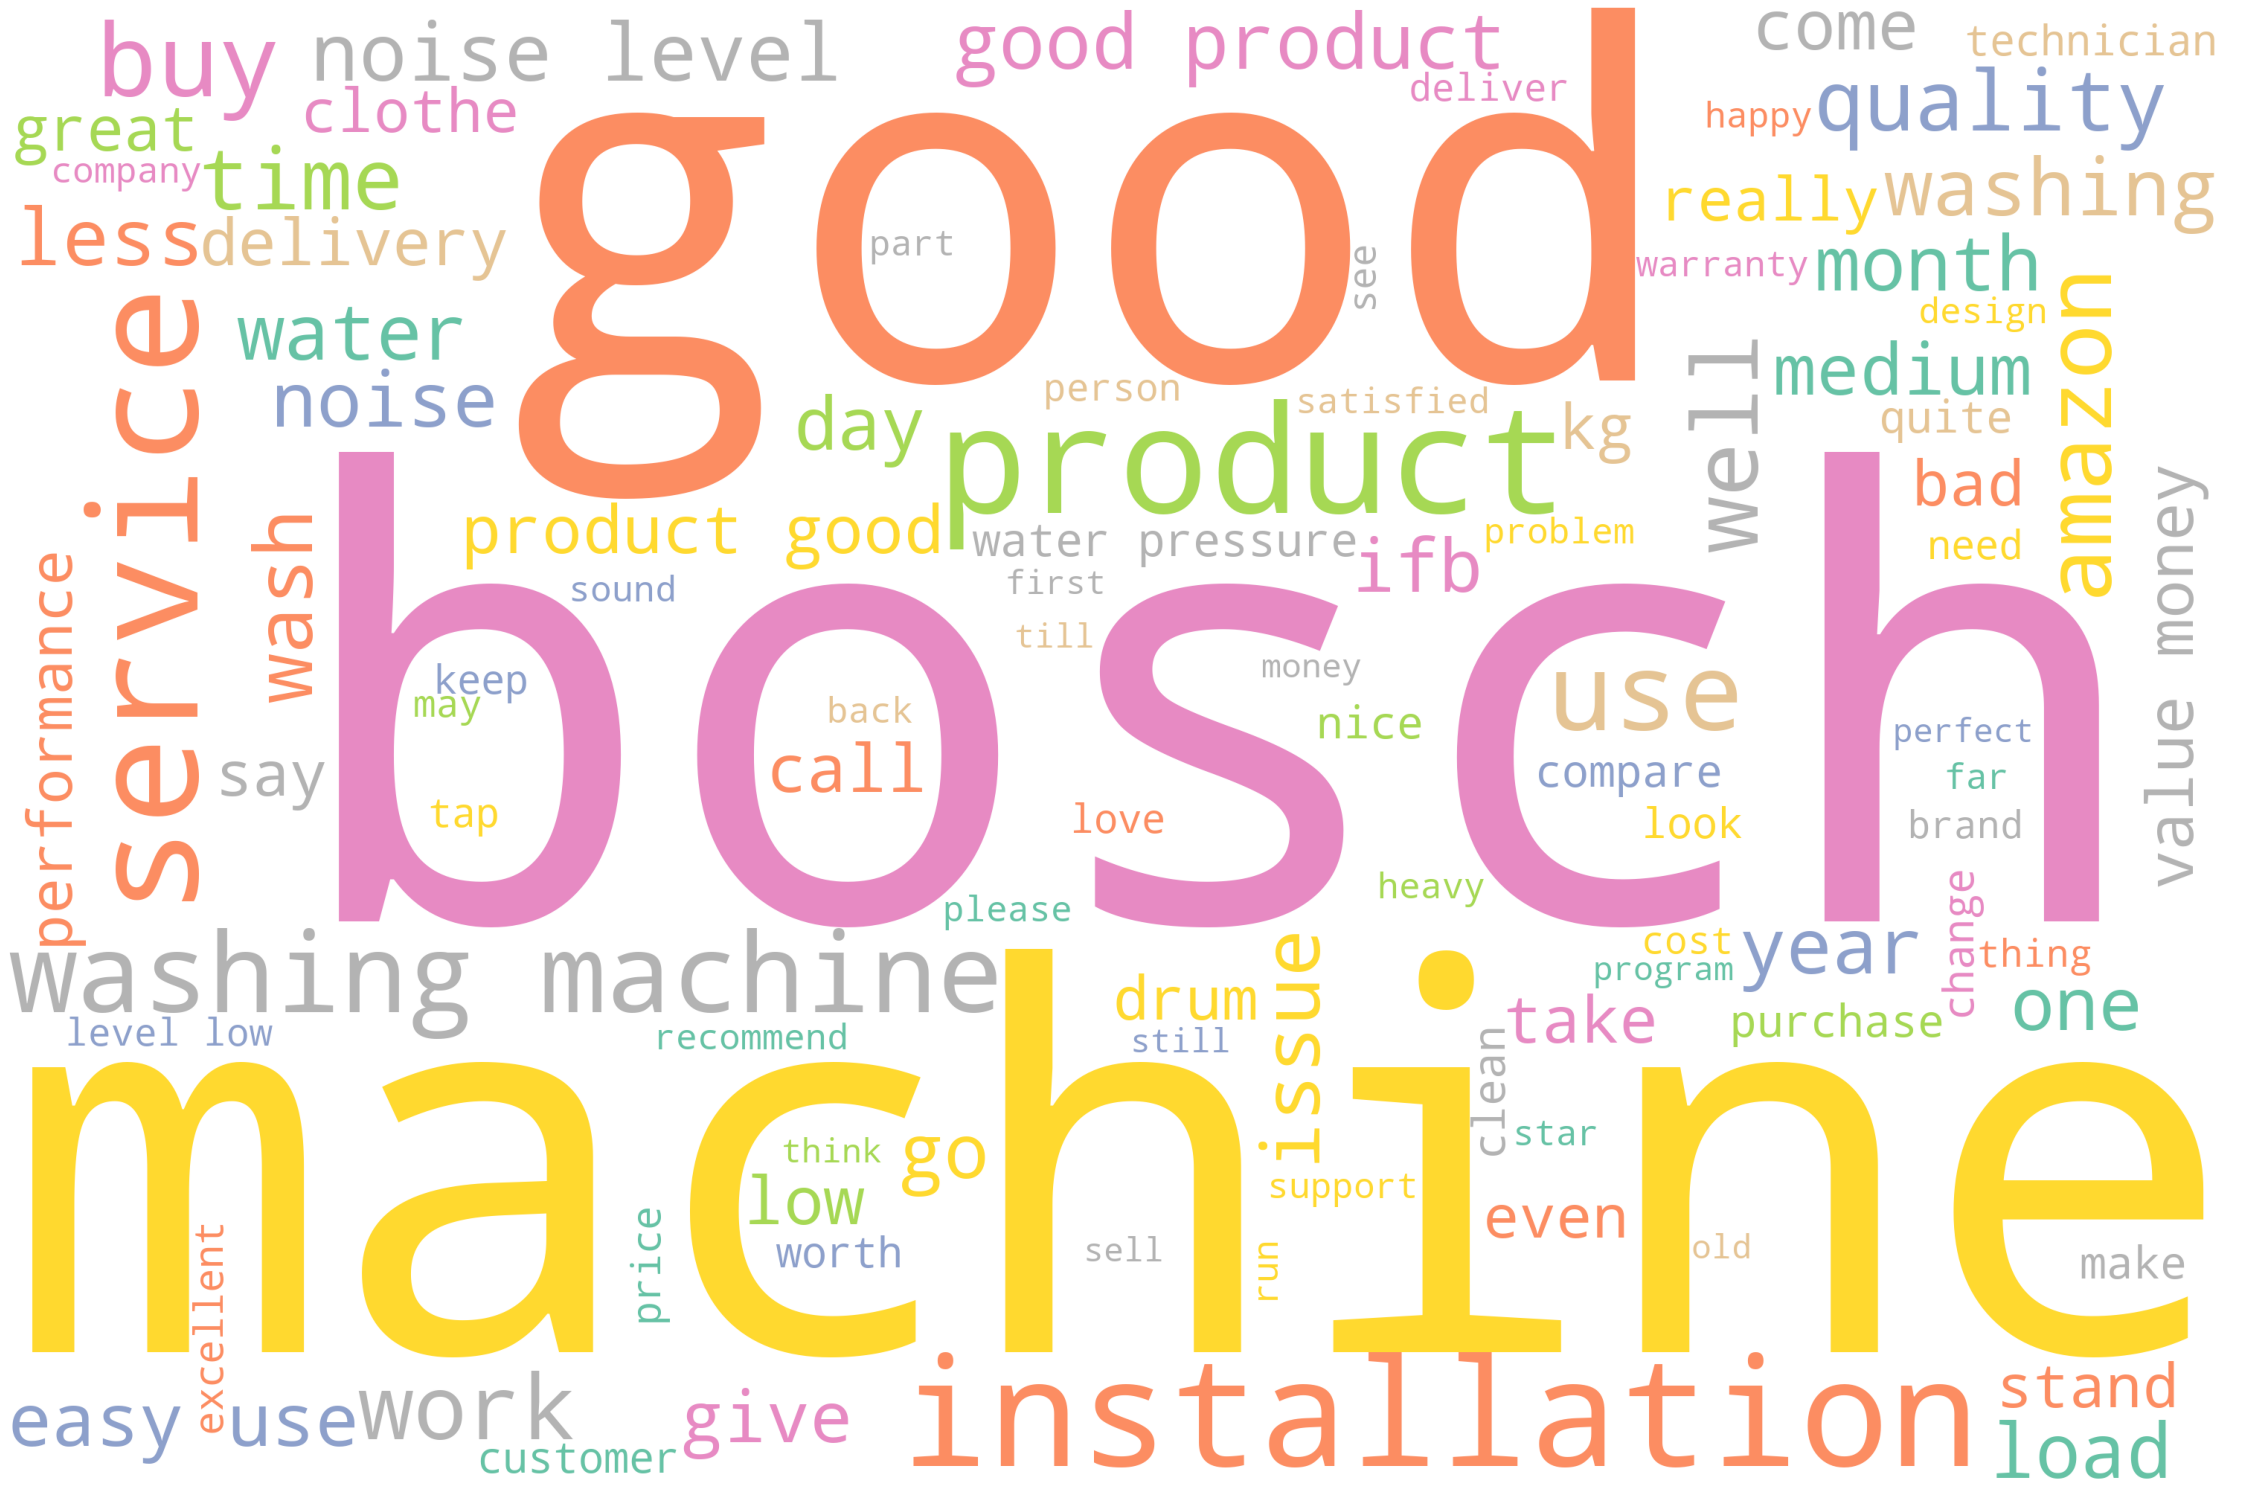

In [30]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

### Named Entity Recognition (NER)

In [31]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [32]:
for token in doc_block[100:200]:
    print(token,token.pos_)

to PART
purchase VERB
the DET
dishwasher NOUN
tooall VERB
the DET
good NOUN
for ADP
any DET
query NOUN
plz INTJ
ask VERB
machine NOUN
great ADJ
its PRON
simple ADJ
easy ADJ
use NOUN
noise NOUN
level NOUN
minimum ADJ
place NOUN
standthe NOUN
technician PROPN
come NOUN
setup NOUN
also ADV
sell VERB
standnot NOUN
bosch PROPN
price NOUN
2k NUM
washing NOUN
machine NOUN
extremely ADV
shaky ADJ
noisy ADJ
keep VERB
stand VERB
technician ADJ
refuse VERB
take VERB
stand VERB
back ADP
hence ADV
remove VERB
stand NOUN
let VERB
machine NOUN
operate VERB
without ADP
stand NOUN
do AUX
not PART
con VERB
techs NOUN
stand VERB
infact PROPN
bosch PROPN
make VERB
clear ADJ
recommend VERB
use NOUN
stand VERB
we PRON
buy VERB
front ADJ
load NOUN
washing NOUN
machine NOUN
king NOUN
time NOUN
think VERB
water NOUN
pressure NOUN
tap NOUN
would AUX
enough ADV
we PRON
prove VERB
wrong ADJ
bosch NOUN
washing NOUN
machine NOUN
work NOUN
without ADP
issue NOUN
clean ADJ
performance NOUN
time NOUN
also ADV
amazing 

In [33]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['king', 'time', 'think', 'water', 'pressure', 'tap', 'prove', 'bosch', 'washing', 'machine', 'work', 'issue', 'performance', 'time', 'recommend', 'kg', 'version', 'version', 'inr', 'installation', 'domo', 'noise', 'vibration', 'recording', 'point', 'con', 'product', 'recommend', 'family', 'machine', 'way', 'machine', 'price', 'lg', 'do', 'job', 'part', 'touch', 'panel', 'touch', 'get', 'activate', 'noise', 'level', 'use', 'modesvalue', 'money', 'comment', 'month', 'ifb', 'year', 'running', 'bar', 'issue', 's', 'call', 'value', 'money', 'master', 'washing', 'clothe', 'load', 'washing', 'machine', 'use', 'rival', 'clothe', 'come', 'product', 'build', 'quality', 'time', 'delivery', 'package', 'front', 'authorize', 'get', 'appliance', 'remove', 'star', 'noise', 'feel', 'noise', 'wash', 'mode', 'washing', 'machine', 'thing', 'installation', 'guy', 'come', 'installation', 'busy', 'explain', 'water', 'leakage', 'complain', 'service', 'turn', 'installation']


In [34]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,machine,130
1,product,86
2,washing,67
3,use,61
4,service,53
5,installation,49
6,noise,43
7,bosch,39
8,buy,37
9,water,33


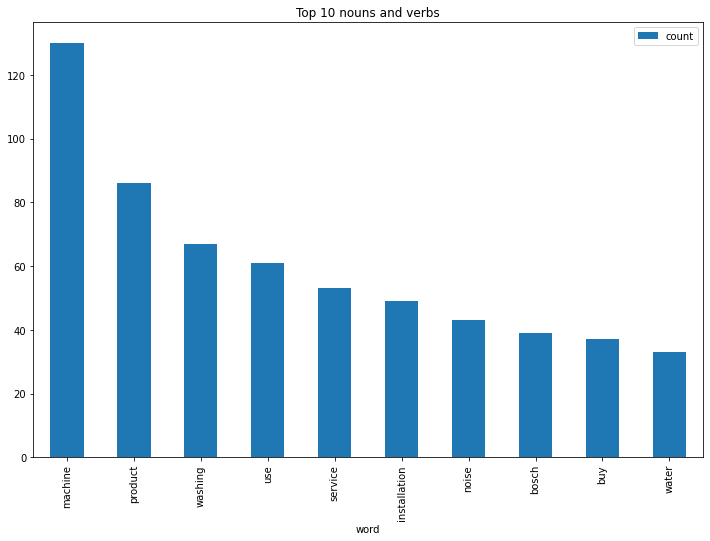

In [35]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [36]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

["Best washing machine in the world 🌍 i use whirlpool machine before I faced so many issues then i got Bosh washing machine i am writing this review ofter 6months of using Bosh feeling really happy to purch the best 💗 machine 👍😊 I tell u honestly, market is flooded with autom machines, at huge marketing gimmicks, don't fall for it, Bosch technology is apar, from other manufacturers, the noise level is so calm, that sometimes we even forget that machine is running, until the final alarm buzzes.Washing is so easy to operate as per indian mothers, it's very very easy to remember and operate..no confusion at all.Quality of washing is very neat, do as per the modes given, bt one advice always keep the rpm at 800-1000, for cloth quality to be long life ..Consumption of watr and electricity is bery less as compared to our last LG semi automatic machine.IM IN LOVE WITH BOSCH , PLANNING TO PURCHASE THE DISHWASHER TOO...ALL THE BEST .",
 'FOR ANY QUERIES PLZ ASK .',
 'The machine is great.',
 "I

In [37]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Best washing machine in the world 🌍 i use whir...
1,FOR ANY QUERIES PLZ ASK .
2,The machine is great.
3,It's very simple and easy to use.
4,The noise levels are at minimum when it's not ...
...,...
462,In this price range this a best value for mone...
463,"Good product and food cloth clean , amazing bu..."
464,Very very unfortunate.
465,Nobody replaces new machine for a new one.


In [40]:
# Emotion Lexicon - Affin
affin=pd.read_csv('D:/Course/ExcelR_Classroom_Study/Data_Science_Assignment/16._Text_Mining/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,a+,3
1,abound,3
2,abounds,3
3,abundance,3
4,abundant,3
...,...,...
6784,zaps,-3
6785,zealot,-3
6786,zealous,-3
6787,zealously,-3


In [41]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'a+': 3,
 'abound': 3,
 'abounds': 3,
 'abundance': 3,
 'abundant': 3,
 'accessable': 3,
 'accessible': 3,
 'acclaim': 3,
 'acclaimed': 3,
 'acclamation': 3,
 'accolade': 3,
 'accolades': 3,
 'accommodative': 3,
 'accomodative': 3,
 'accomplish': 3,
 'accomplished': 3,
 'accomplishment': 3,
 'accomplishments': 3,
 'accurate': 3,
 'accurately': 3,
 'achievable': 3,
 'achievement': 3,
 'achievements': 3,
 'achievible': 3,
 'acumen': 3,
 'adaptable': 3,
 'adaptive': 3,
 'adequate': 3,
 'adjustable': 3,
 'admirable': 3,
 'admirably': 3,
 'admiration': 3,
 'admire': 3,
 'admirer': 3,
 'admiring': 3,
 'admiringly': 3,
 'adorable': 3,
 'adore': 3,
 'adored': 3,
 'adorer': 3,
 'adoring': 3,
 'adoringly': 3,
 'adroit': 3,
 'adroitly': 3,
 'adulate': 3,
 'adulation': 3,
 'adulatory': 3,
 'advanced': 3,
 'advantage': 3,
 'advantageous': 3,
 'advantageously': 3,
 'advantages': 3,
 'adventuresome': 3,
 'adventurous': 3,
 'advocate': 3,
 'advocated': 3,
 'advocates': 3,
 'affability': 3,
 'affable'

In [42]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [43]:
# manual testing
calculate_sentiment(text='good service')

3

In [44]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       6
1       0
2       3
3       3
4      -3
       ..
462     3
463    12
464    -3
465     0
466     3
Name: sentiment_value, Length: 467, dtype: int64

In [45]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      166
1        6
2        4
3        7
4       29
      ... 
462     11
463     51
464      3
465      8
466      2
Name: word_count, Length: 467, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
447,Don't purchase Bosch company products they wil...,-9,44
203,Machine is shaking a lot Bosch service agent s...,-9,26
433,"The machine showed some issues, so shock abso...",-6,10
134,The filters they out basically slows down the ...,-6,37
144,Initially it used to vibrate a lot when drying...,-6,31
...,...,...,...
413,"Good product Good product at good price range,...",15,37
266,"Nice product Like,very good product with good ...",18,15
215,Very good product only thing is your water pre...,21,65
417,Product is good... nan Good product Easy to us...,21,34


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    467.000000
mean       1.573876
std        4.315906
min       -9.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [48]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
1,FOR ANY QUERIES PLZ ASK .,0,6
4,The noise levels are at minimum when it's not ...,-3,29
5,The washing machine was extremely shaky and to...,-6,14
6,The technician refused to take the stand back..,-3,8
7,Hence we have removed the stand and let the ma...,0,14
...,...,...,...
459,We are using Bosch washing machine since 2 years.,0,9
460,"We have ordered this new one, and surprisingly...",0,19
461,The quality of washing is at It's high and the...,0,40
464,Very very unfortunate.,-3,3


In [49]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Best washing machine in the world 🌍 i use whir...,6,166
2,The machine is great.,3,4
3,It's very simple and easy to use.,3,7
9,Infact Bosch should make it clear if it's reco...,6,13
10,We did not buy a front load washing machine fo...,3,25
...,...,...,...
452,Loading capacity of clothes needs minimum 6 kg...,6,14
454,Loving this from Bosch Noise level is all most...,9,20
462,In this price range this a best value for mone...,3,11
463,"Good product and food cloth clean , amazing bu...",12,51


In [50]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Best washing machine in the world 🌍 i use whir...,6,166,0
1,FOR ANY QUERIES PLZ ASK .,0,6,1
2,The machine is great.,3,4,2
3,It's very simple and easy to use.,3,7,3
4,The noise levels are at minimum when it's not ...,-3,29,4
...,...,...,...,...
462,In this price range this a best value for mone...,3,11,462
463,"Good product and food cloth clean , amazing bu...",12,51,463
464,Very very unfortunate.,-3,3,464
465,Nobody replaces new machine for a new one.,0,8,465


C:\Users\Sharda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

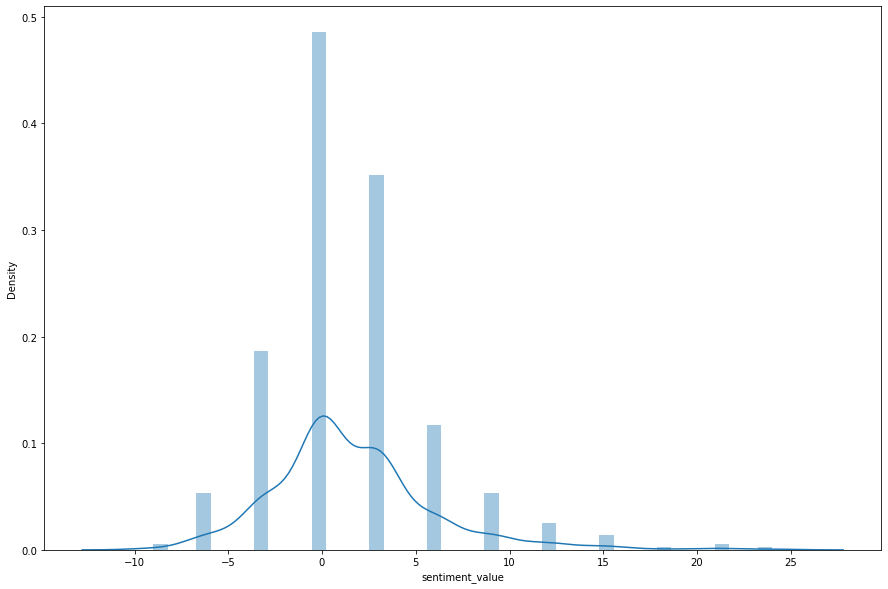

In [51]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

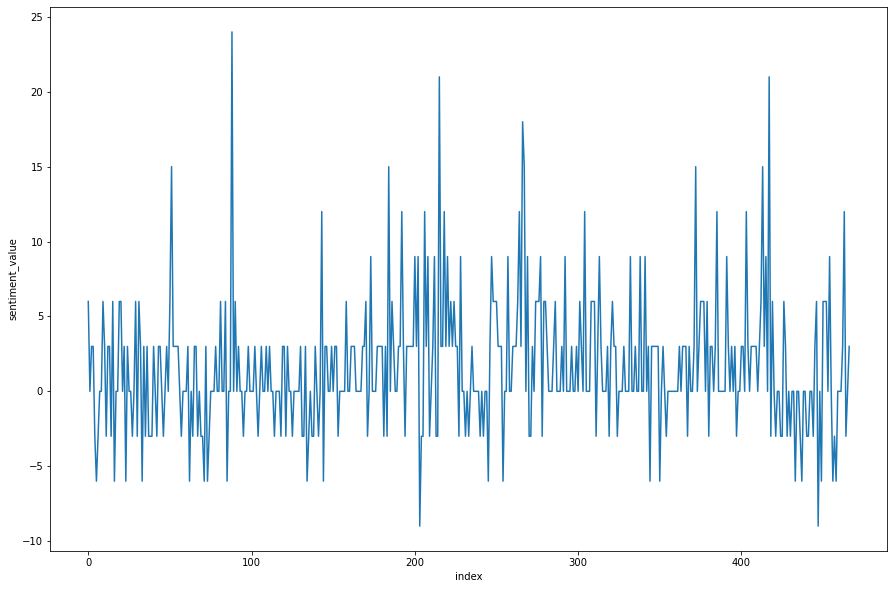

In [52]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)